# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

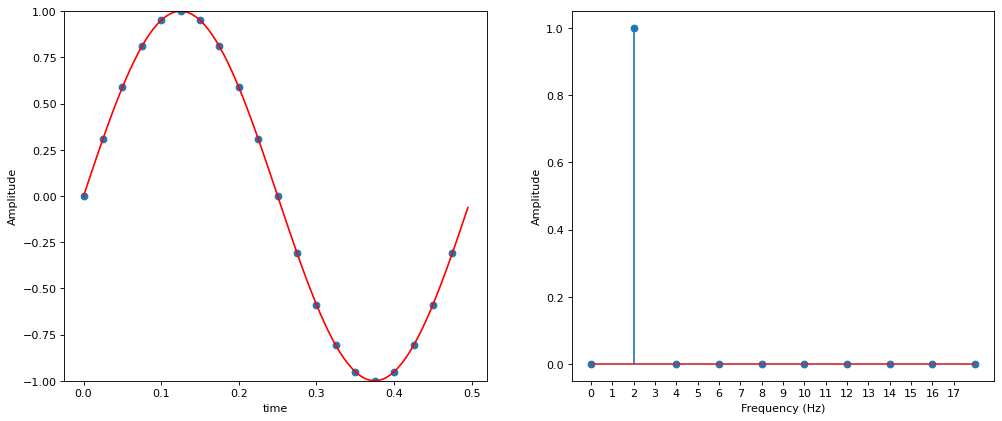

In [2]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

def plot_signal_and_fft(A, F, LP, w):

    T = 1/F      # Okres sygnału [s]
    f = lambda t: A * np.sin(2 * pi * t * F)  # Def. analizowanej funkcji (sygnału)

    # --- Probkujemy sygnal
    TW = 1 / w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    #LP = Liczba analizowanych pełnych okresów sygnalu
    t = np.arange(0, LP * T, TW)  # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)  # Liczba próbek

    signal = f(t) 

    #--- Rysujemy sygnaĹ (niebieskie kĂłĹka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnaĹ przed sprĂłbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_xlabel('time')
    ax.set_ylabel('Amplitude')

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = np.abs(signal1)/len(signal)
    # Multiply by 2 to account for both positive and negative frequencies
    signal1 = 2*signal1 

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    #freqs = range(n)
    #stem(freqs, signal1, '-*')

    freqs = np.fft.fftfreq(n, TW)  # Calculate frequencies in Hz
    #stem(freqs, signal1, '-*')
    # Display only positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[freqs >= 0]

    stem(positive_freqs, positive_signal1, '-*')

    # Set x-axis labels to Hz
    ax.set_xticks(np.arange(0, max(positive_freqs), step=1))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')

# Example usage
plot_signal_and_fft(A=1, F=2.0, LP=1, w=40)


**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

In [19]:
interact(plot_signal_and_fft, A=(0.5,2,0.5), F=(0.5,4.0,0.5), LP=(1.0,10.0,1.0), w=(20,100,5))

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=0.5, step=0.5), FloatSlider(value=2…

<function __main__.plot_signal_and_fft(A, F, LP, w)>

#### b) Zmień częstotliwość próbkowania na 50Hz.

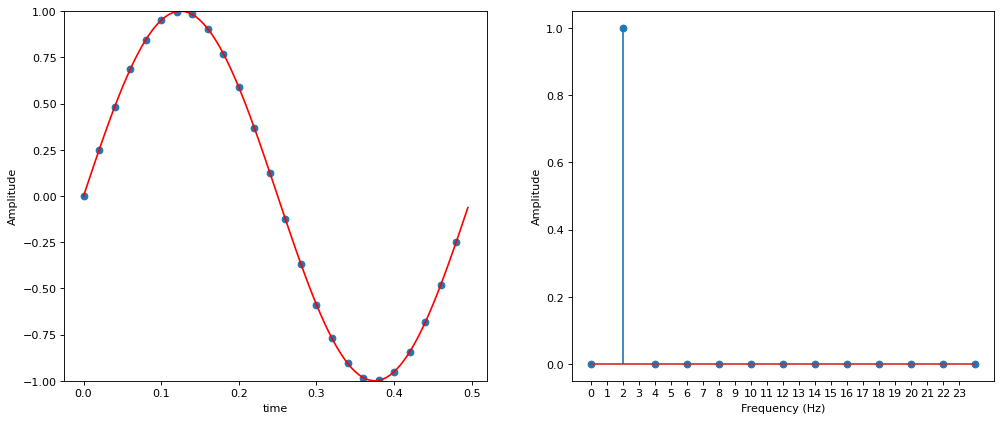

In [20]:
plot_signal_and_fft(A=1, F=2.0, LP=1, w=50)

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

Poprawiłem w definicji funkcji w punkcie a.

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

Poprawiłem w definicji funkcji w punkcie a.

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'>Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy</font>? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik</font>?

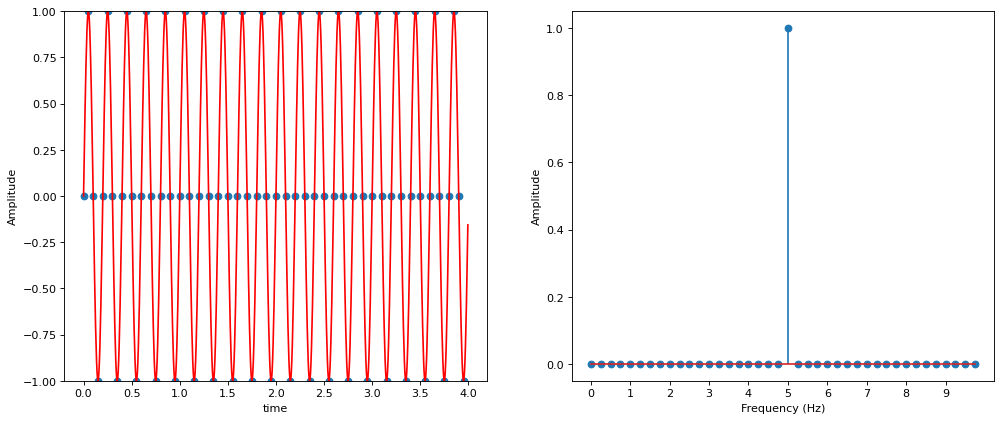

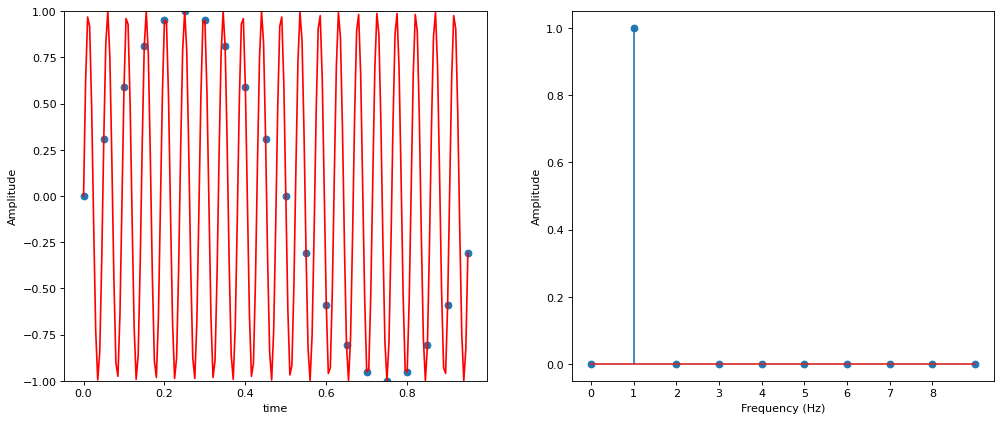

In [21]:
plot_signal_and_fft(A=1, F=5.0, LP=20, w=20)
plot_signal_and_fft(A=1, F=21.0, LP=20, w=20)

Ze względu na zbyt małą częstotliwość próbkowania (niespełnione twierdzenie o próbkowaniu Nyquista–Shannona).

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

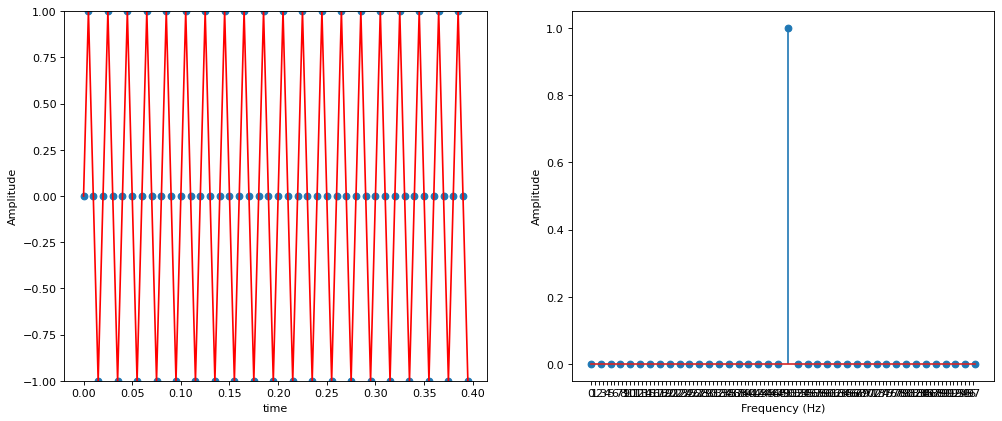

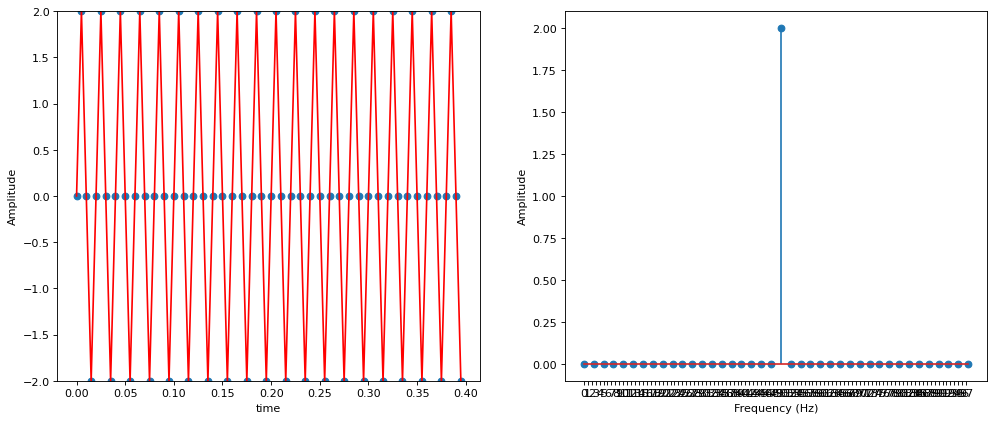

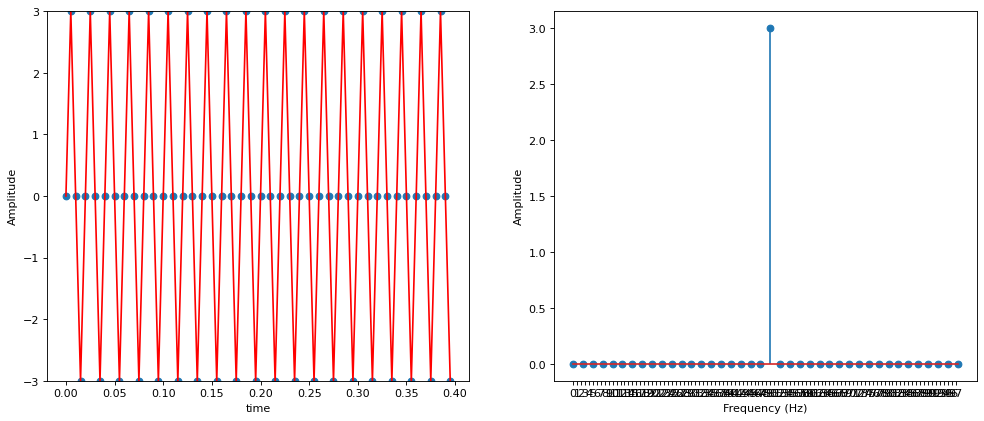

In [22]:
plot_signal_and_fft(A=1, F=50.0, LP=20, w=200)
plot_signal_and_fft(A=2, F=50.0, LP=20, w=200)
plot_signal_and_fft(A=3, F=50.0, LP=20, w=200)

Jest proporcjonalna do amplitudy.

#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

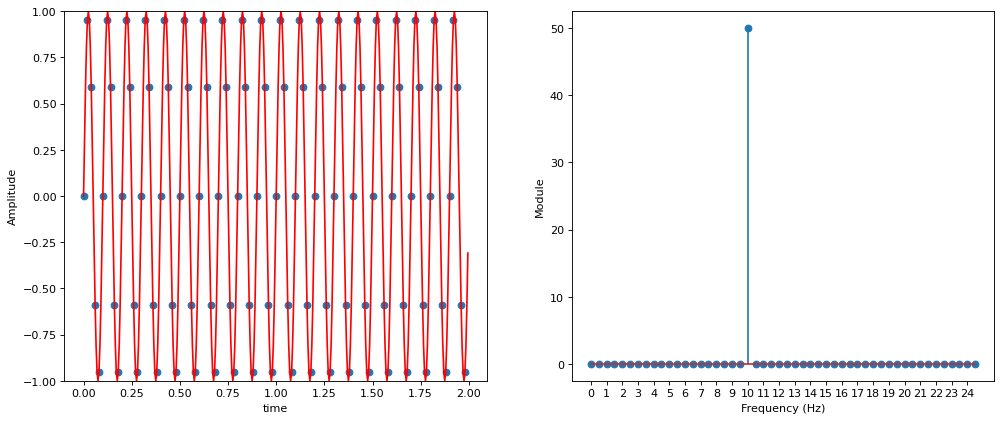

In [14]:
plot_signal_and_fft(A=1, F=10.0, LP=20, w=50)

To zależy od przyjętej częstotliwości sygnału.
<br>
Można to policzyć ze wzoru: (1/F) * LP * w

#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

Poprawiłem w definicji funkcji w punkcie a.

In [1]:
interact(plot_signal_and_fft, A=(0.0,10,0.5), F=(0.5,5.0,0.5), LP=(1.0,10.0,1.0), w=(20,100,5))

NameError: name 'interact' is not defined

## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

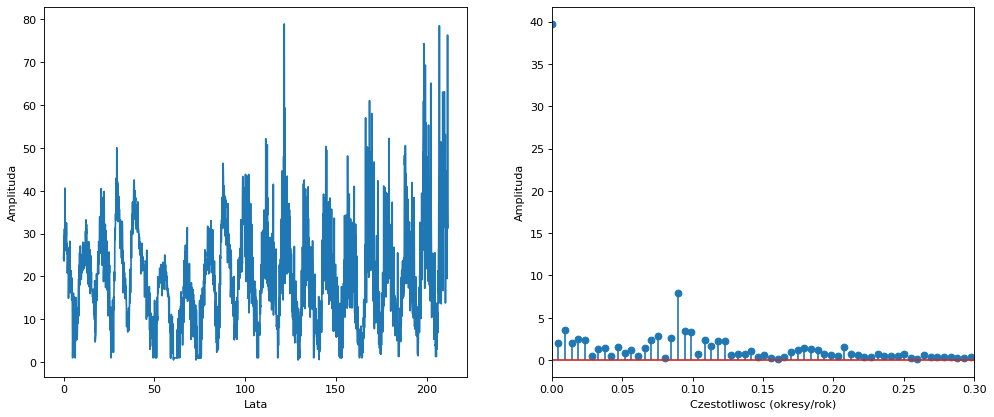

Czestotliwosc sygnalu wynosi 0.0897 okresow na rok, co oznacza ze okres sygnalu wynosi 11.1491 lat.


In [65]:
# Load data from the local file
signal = np.loadtxt("spots.txt")
t = np.arange(len(data))

#--- Plotting the signal
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t/12, signal, '-')
ax.set_xlabel('Lata')
ax.set_ylabel('Amplituda')

#--- FFT calculation
signal_fft = np.fft.fft(signal)
signal_fft = np.abs(signal_fft) / len(signal)
signal_fft = 2 * signal_fft

#--- Plotting the FFT
ax = fig.add_subplot(122)
freqs = np.fft.fftfreq(len(signal), d=1) * 12 # Calculate frequencies in periods/year
positive_freqs = freqs[freqs >= 0]
positive_signal_fft = signal_fft[freqs >= 0]

threshold = 0.1  # Define the threshold for displaying frequencies
valid_indices = positive_signal_fft > threshold
valid_freqs = positive_freqs[valid_indices]
valid_signal_fft = positive_signal_fft[valid_indices]

ax.stem(valid_freqs, valid_signal_fft, '-*')
ax.set_xlim([0, 0.3])
ax.set_xlabel('Czestotliwosc (okresy/rok)')
ax.set_ylabel('Amplituda')

plt.show()

# Identify the greatest frequency excluding DC component
non_zero_freqs = valid_freqs[1:]  # Exclude the DC component
non_zero_signal_fft = valid_signal_fft[1:]  # Exclude the DC component

max_freq_index = np.argmax(non_zero_signal_fft)
max_freq = non_zero_freqs[max_freq_index]

print(f"Czestotliwosc sygnalu wynosi {max_freq:.4f} okresow na rok, co oznacza ze okres sygnalu wynosi {1/max_freq:.4f} lat.")


## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2*pi*t) + sin(4*pi*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

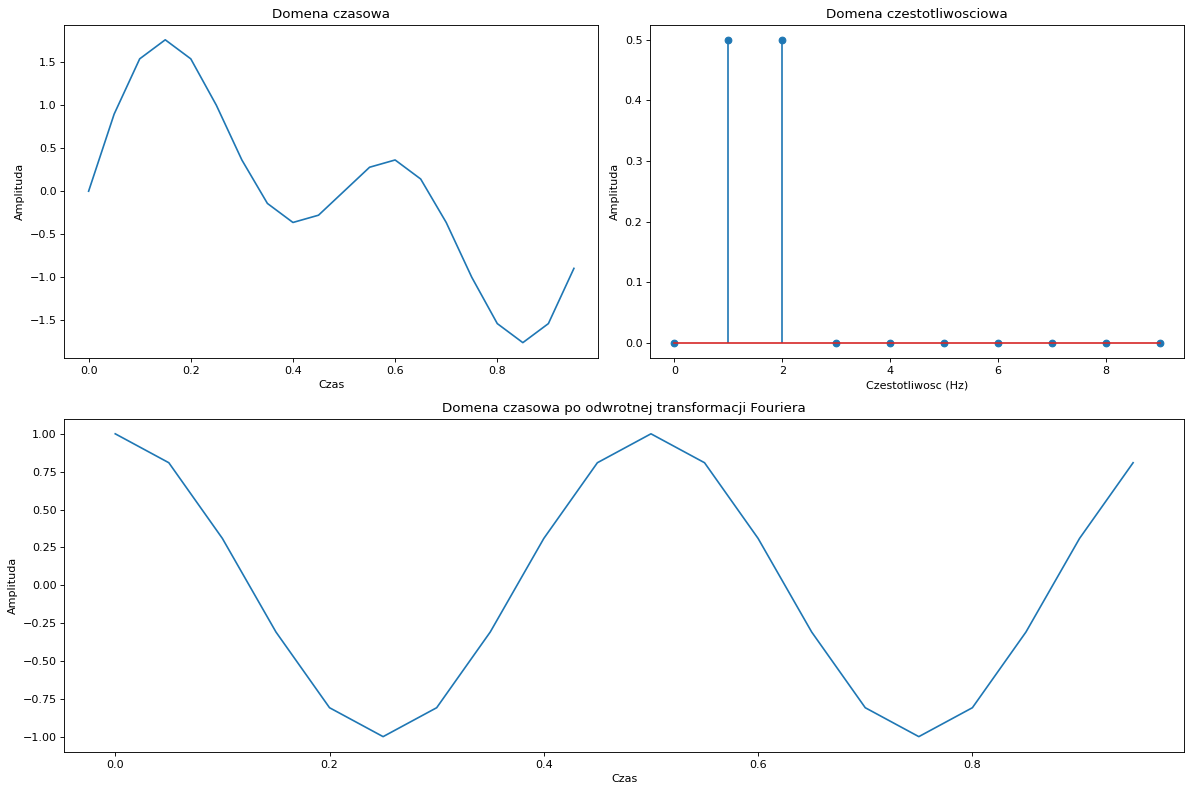

In [131]:
# Definicja sygnału
T = 1  # Okres sygnału [s]
w = 20  # Częstotliwość próbkowania [Hz]

t = np.arange(0, T, 1/w)  # Wektor czasu
signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)  # Sygnał: sin(2*pi*t) + sin(4*pi*t)

# Wykres sygnału w dziedzinie czasu
fig = plt.figure(figsize=(15, 10), dpi=80)   
ax = fig.add_subplot(221)
ax.plot(t, signal, '-')
ax.set_xlabel('Czas')
ax.set_ylabel('Amplituda')
ax.set_title('Domena czasowa')

# Transformata Fouriera
ax = fig.add_subplot(222)
signal_fft = np.fft.fft(signal)
signal_fft = np.abs(signal_fft)/len(signal)
freqs = np.fft.fftfreq(len(signal), d=1/w)  # Obliczenie częstotliwości
positive_freqs = freqs[freqs >= 0]
positive_signal = signal_fft[freqs >= 0]
ax.stem(positive_freqs, positive_signal, '-*')
ax.set_xlabel('Czestotliwosc (Hz)')
ax.set_ylabel('Amplituda')
ax.set_title('Domena czestotliwosciowa')

# Removing the component corresponding to 2*pi frequency
freq_to_remove = 1  # Frequency to remove [Hz]
index_to_remove = np.where(np.abs(freqs) == freq_to_remove)[0]  # Finding index to remove
signal_fft[index_to_remove] = 0  # Removing the component

# Inverse Fourier Transform to obtain the modified signal
filtered_signal = np.fft.ifft(signal_fft)
# Un-normalize
filtered_signal *= len(signal)

# Ensure the length of filtered_signal matches the length of t
if len(filtered_signal) != len(t):
    filtered_signal = np.pad(filtered_signal, (0, len(t) - len(filtered_signal)), 'constant')

# Plotting the modified signal in the time domain
ax = fig.add_subplot(212)
ax.plot(t, np.real(filtered_signal), '-')
ax.set_xlabel('Czas')
ax.set_ylabel('Amplituda')
ax.set_title('Domena czasowa po odwrotnej transformacji Fouriera')

plt.tight_layout()
plt.show()


## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.

Sampling rate: 44100 Hz


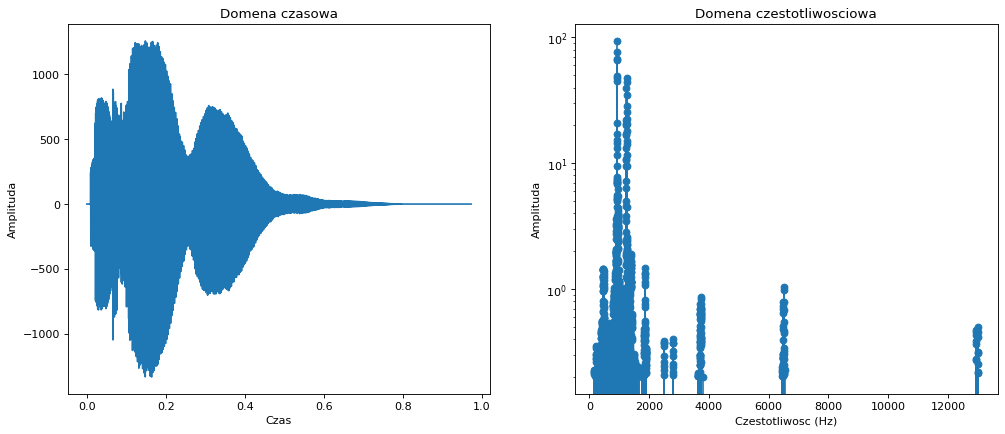

Dominujace czestotliwosci:
1. 931.78 Hz
2. 930.75 Hz
3. 932.81 Hz
4. 935.89 Hz
5. 934.86 Hz
6. 1242.37 Hz
7. 936.92 Hz
8. 929.72 Hz
9. 1243.40 Hz
10. 1241.34 Hz


In [147]:
from scipy.io import wavfile

sampling_rate, signal_stereo = wavfile.read('err.wav')
# Convert stereo to mono by averaging the channels
signal = np.mean(signal_stereo, axis=1)  # Taking the mean across columns
# Check the properties of the audio
print(f'Sampling rate: {sampling_rate} Hz')

# Plotting the audio signal in the time domain
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
time = np.arange(0, len(signal)) / sampling_rate  # Time vector
ax.plot(time, signal, '-')
ax.set_xlabel('Czas')
ax.set_ylabel('Amplituda')
ax.set_title('Domena czasowa')

# Transformata Fouriera
ax = fig.add_subplot(122)
fft_result = np.fft.fft(signal)
fft_result = np.abs(fft_result) / len(signal)  # Normalizing the FFT result

# Generating frequency axis for plotting
freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
positive_freqs = freqs[freqs >= 0]
positive_signal = fft_result[freqs >= 0]

threshold = 0.2  # Define the threshold for displaying frequencies
valid_indices = positive_signal > threshold
valid_freqs = positive_freqs[valid_indices]
valid_signal_fft = positive_signal[valid_indices]

ax.stem(valid_freqs, valid_signal_fft, '-*')
ax.set_yscale('log')
#ax.set_xlim([0, 2000])
ax.set_xlabel('Czestotliwosc (Hz)')
ax.set_ylabel('Amplituda')
ax.set_title('Domena czestotliwosciowa')

plt.show()

# Print the ten most dominant frequencies
sorted_indices = np.argsort(valid_signal_fft)[::-1]  # Sort indices in descending order
top_ten_indices = sorted_indices[:10]  # Take the top ten indices
top_ten_frequencies = valid_freqs[top_ten_indices]  # Get corresponding frequencies

print("Dominujace czestotliwosci:")
for i, freq in enumerate(top_ten_frequencies, 1):
    print(f"{i}. {freq:.2f} Hz")